# Introduction  to Multiple Linear Regression

## example

In [ ]:
#the streeteasy dataset not working so do with other once and see(learn)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)

# Plot the figure

fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Add the code below:
plt.show()

## Training vs Testing

## Using Sklearn

In [ ]:
#Example excercise done with sklearn so do with other dataset
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# Add the code here:
mlr=LinearRegression()
mlr.fit(x_train,y_train)
y_predict=mlr.predict(x_test)

# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)
#can have accuracy checking and scores(r2) here also



## Ploting using Matlpotlib

In [ ]:
#example just learn code after finding y predict and all then to visualize
import codecademylib3_seaborn
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

plt.scatter(y_test,y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

## Multiple Linear Regression-equations

## Correlations

## Evaluation of models accuracy-R2

## Imporve the model

when done sometimes some features are not required and all happens so removing those can be done for that view the weights
i.e the coeffecients view and see the scores(how much of variation of dependent variable is explained by independent variable)
so do changes and see which is better 

# Excersie-Practice

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
sex={'female':0,'male':1}
df['sex']=df['sex'].map(sex)

In [12]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
smoker={'yes':1,'no':0}
df['smoker']=df['smoker'].map(smoker)

In [15]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
region={'southwest':0,'southeast':1,'northwest':2,'northeast':3}
df['region']=df['region'].map(region)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [20]:
corr=df.corr()

<Axes: >

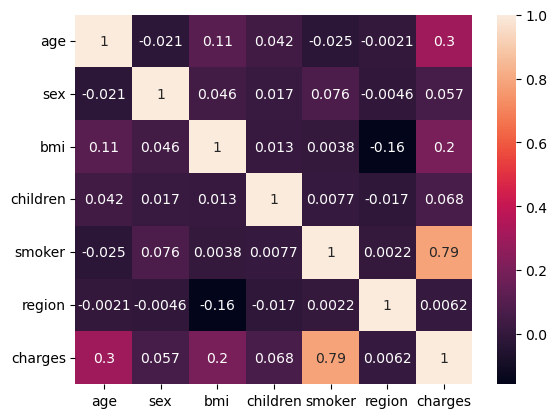

In [21]:
sns.heatmap(corr,annot=True)

<Axes: >

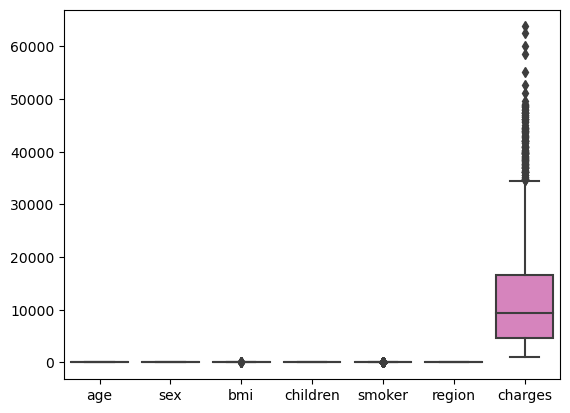

In [36]:
sns.boxplot(data=df)

In [22]:
x=df[['age','sex','bmi','children','smoker','region']]

In [23]:
y=df['charges']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)#we always fit the model with train data not complet x and y(then predict with test data)


LinearRegression()

In [26]:
model.coef_

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04,  2.71284266e+02])

In [27]:
model.intercept_

-12760.459365293491

In [28]:
model.score(x_test,y_test)#above 0.70 score is good

0.7833463107364539

In [29]:
y_pred=model.predict(x_test)

<Axes: xlabel='charges'>

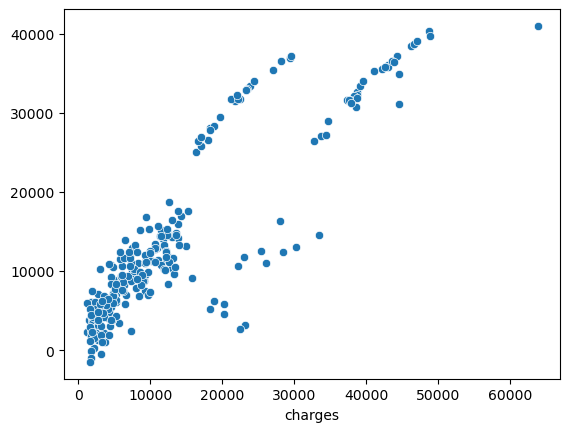

In [30]:
sns.scatterplot(x=y_test,y=y_pred)

In [35]:
mean_squared_error(y_test,y_pred)#for this we put the y_test and y_pred(accuracy and precison and recall not there for linear(as no for continuous values similarly ig confusion matrix wont come)so we use mean square error here)

33635210.431178406